In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def make_payment_graph(n):
    G1 = nx.DiGraph()

    # Layer 1
    G1.add_nodes_from([("Payments",{"value":n})])
    
    # layer 2
    G1.add_node("Bill Payment")
    G1.add_edges_from([("Payments","Bill Payment",{"count":0})])
    
    #layer 3
    G1.add_node("3rd Party Payments")
    G1.add_node("Card Bill Pay")
    G1.add_node("Payment History")
    G1.add_edges_from([("Bill Payment","3rd Party Payments",{"count":0}),
                       ("Bill Payment","Card Bill Pay",{"count":0}),
                       ("Bill Payment","Payment History",{"count":0})])
    #Layer 4
    G1.add_node("View scheduled payments")
    G1.add_node("Payment Successful")
    G1.add_node("Payment Failure")
    G1.add_node("View ebill statement")

    G1.add_edges_from([
                       ("3rd Party Payments","View scheduled payments",{"count":0}),
                       ("Card Bill Pay","Payment Successful",{"count":0}),
                       ("Card Bill Pay","Payment Failure",{"count":0}),
                       ("Payment History","View ebill statement",{"count":0}),
    ])
    
    #Layer 5
    G1.add_node("Cancel Payment")
    G1.add_node("View scheduled - Drop Off")
    G1.add_node("Payment Successful - Drop Off")
    G1.add_node("Contact Customer Care")
    G1.add_node("Payment Failure - Drop Off")
    G1.add_node("View Ebill Statement - Drop Off")
    G1.add_node("Bill Enquiry")

    G1.add_edges_from([
                       ("View scheduled payments","Cancel Payment",{"count":0}),
                       ("View scheduled payments","View scheduled - Drop Off",{"count":0}),
                       ("Payment Successful","Payment Successful - Drop Off",{"count":0}),
                       ("Payment Failure","Contact Customer Care",{"count":0}),
                       ("Payment Failure","Payment Failure - Drop Off",{"count":0}),
                       ("View ebill statement","View Ebill Statement - Drop Off",{"count":0}),
                       ("View ebill statement","Bill Enquiry",{"count":0}),
    ])
    
    # Layer 6
    G1.add_node("Chat1")
    G1.add_node("Cancel Payment - Drop Off")
    G1.add_node("Chat2")
    G1.add_node("IVR2")
    G1.add_node("Chat3")
    G1.add_node("IVR3")
    
    G1.add_edges_from([
                       ("Cancel Payment","Chat1",{"count":0}),
                       ("Cancel Payment","Cancel Payment - Drop Off",{"count":0}),
                       ("Contact Customer Care","Chat2",{"count":0}),
                       ("Contact Customer Care","IVR2",{"count":0}),
                       ("Bill Enquiry","Chat3",{"count":0}),
                       ("Bill Enquiry","IVR3",{"count":0})
    ])

    # Layer 7
    G1.add_node("Chat1 - Drop Off")
    G1.add_node("Chat2 - Drop Off")
    G1.add_node("IVR1")
    G1.add_node("Branch1")
    G1.add_node("IVR2 - Drop Off")
    G1.add_node("Phone1")
    G1.add_node("Chat3 - Drop Off")
    G1.add_node("IVR2 - Drop Off")
    G1.add_node("IVR3 - Drop Off")  
    G1.add_node("Phone2")    
    
    G1.add_edges_from([
                       ("Chat1","Chat1 - Drop Off",{"count":0}),
                       ("Chat2","Chat2 - Drop Off",{"count":0}),
                       ("Chat2","IVR1",{"count":0}),
                       ("Chat2","Branch1",{"count":0}),
                       ("IVR2","IVR2 - Drop Off",{"count":0}),
                       ("IVR2","Phone1",{"count":0}),
                       ("Chat3","Chat3 - Drop Off",{"count":0}),
                       ("IVR3","IVR3 - Drop Off",{"count":0}),
                       ("IVR3","Phone2",{"count":0}),
        
    ])
    
    # Layer 8
    G1.add_node("IVR1 - Drop Off")
    G1.add_node("Branch1 - Drop Off")
    G1.add_node("Phone1 - Drop Off")
    G1.add_node("Branch2")
    G1.add_node("Phone2 - Drop Off")
    
    G1.add_edges_from([
                       ("IVR1","IVR1 - Drop Off",{"count":0}),
                       ("IVR1","Branch1 - Drop Off",{"count":0}),
                       ("Phone1","Phone1 - Drop Off",{"count":0}),
                       ("Phone1","Branch2",{"count":0}),
                       ("Phone2","Phone2 - Drop Off",{"count":0}),
        
    ])
    return G1

    
    

In [3]:
def get_graph(type="Payment Journey", n=10000):
    mapper = {
        "Payment Journey": make_payment_graph
    }
    return mapper[type](n)


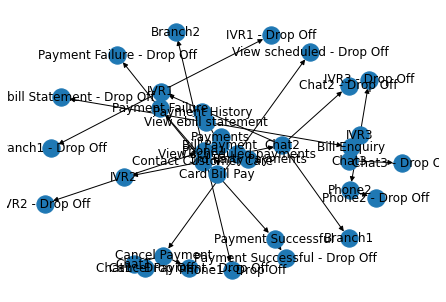

In [4]:
j = get_graph(type="Payment Journey")
nx.draw(j, with_labels=True)


In [14]:
def generate_random_graph_data(journey_type="Payment Journey", init_value=10000):

    G1 = get_graph(type=journey_type, n=init_value)

    for n, node_attributes in list(G1.nodes(data=True)):
        # get the node value
        node_value = node_attributes["value"]

        # get the successors to the node
        succ = list(G1.successors(n))

        # generate random numbers and percentages
        k=np.random.rand(len(succ))
        perc = k / sum(k)

        # initiate dictionary to store edge and node properties
        update_edges_dict = {}
        update_nodes_dict = {}

        # Update  the percentage and the counts
        if (len(succ) > 0):
            for ind, s in enumerate(succ):
    #            print(f'successor - {s} - {ind} - {G1[s]}')
                update_edges_dict[(n,s)] = {"perc":perc[ind],"count":perc[ind] * node_value}
                update_nodes_dict[s] = {"value":perc[ind] * node_value}
            nx.set_node_attributes(G1,update_nodes_dict)
            nx.set_edge_attributes(G1,update_edges_dict)
    # convert this into a list of lists and send the output
    return [ [from_node, to_node, attrib["count"]] for from_node, to_node, attrib in list(G1.edges(data=True))]

In [18]:
def generate_graph_combinations():
    # Intialize the combinations
    segments=["Segment1","Segment2","Segment3", "Segment4"]
    lobs=["Credit Cards","Checking account", "Retail Loans"]
    geos=["North America","Latin America","Asia","Europe","Australia"]
    months=["Jan-19","Feb-19","Mar-19","Apr-19","May-19","Jun-19","Jul-19","Aug-19","Sep-19","Oct-19","Nov-19","Dec-19"]
    start_channels=["web"]
    journey_types=["Payment Journey"]
    
    init_numbers = np.arange(10000,50000, 500)
    
    # create place holder for all combinations

    final_list=[]
    for lob in lobs:
        for geo in geos:
            for mnth in months:
                for seg in segments:
                    for chnl in start_channels:
                        for jrny in journey_types:
                            k = generate_random_graph_data(journey_type=jrny, init_value=np.random.choice(init_numbers,1)[0])
                            final_list.append((lob,geo,mnth,seg,chnl,jrny, k))
    
    # create a data frame and return the data frame
    df = pd.DataFrame(final_list, columns =['lob', 'geo','month','seg','startchannel','journey','sankey'])
    return df

In [19]:
all_combinations = generate_graph_combinations()

In [20]:
all_combinations.to_csv("./../output/graph_data.csv")